# Assignment 1

**Submission deadline:**
* **Problems 1-4: last lab session before or on Wednesday, 18.10.17**
* **Problems 5-6: last lab session before or on Wednesday, 25.10.17**

**Points: 10 + 4 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

## Downloading this notebook

This assignment is an Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments. Follow the instructions in its README for instructions. Whenever possible, add your solutions to the notebook. 

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use **GitHub’s pull requests** to send us corrections!

In [3]:
# Standard IPython notebook imports
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

## Problem 0 [0p]
1. Get familiar with [lab_guide.pdf](https://github.com/janchorowski/nn_assignments/blob/nn17_fall/lab_guide.pdf). It is not obligatory to use the labs remotely and most of the time you will do just fine with your own machine. However, we recommend using labs for the most computationally-intensive tasks such as the final projects.

    Make sure you know how to:
    * load the Anaconda Python distribution with `/pio/os/anaconda/set-env.sh` (confirm with `python -V`)
    <br/>
    (also: look into this `nn_assignments`' `set-env.sh` and see that it loads `Anaconda` for you),
    * connect to labs 110/137 from *outside* of the faculty,
    * copy a file over an ssh tunnel or connect remotely to a Jupyter Notebook,
    * use `GNU screen`, `tmux` and/or `nohup`,
    * leave a process running, disconnect, connect again and verify it is still running.
  
  In case of problems, ask for help!
  
  
2. Read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.

## Problem 1 [2p]

First, get familiar with Python at https://docs.python.org/2/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at http://wiki.scipy.org/Tentative_NumPy_Tutorial.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python,
http://ipython.org/
  3. access to IPython through an ordinary web browser,
http://ipython.org/notebook.html
  4. a plotting library for Python.
http://matplotlib.org/

**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [16]:
# TODO: Complete the declarations
a = 10
b = 2.5 * pow(10,23)
c = 2 + 3j
d = np.exp(2j*np.pi/3)
print (a, b, c, d)

10 2.5e+23 (2+3j) (-0.5+0.866025403784j)


**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 2.71 & 8 & 28 & 182 \end{bmatrix}^\intercal$ (column vector),
3. $cVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
4. $dVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
5. $eVec=Hello$ ($eVec$ is a string of characters, thus a vector).

In [209]:
aVec = np.asmatrix([3.14, 15, 9, 26])
bVec = np.asmatrix([2.71, 8, 28, 182]).transpose()
cVec = np.arange(5,-5,-0.2)
dVec = np.logspace(1,10,101)
eVec = "Hello"
print (bVec)

[[   2.71]
 [   8.  ]
 [  28.  ]
 [ 182.  ]]


**c) Declare matrices:**
1. $aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. $bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with zeros, with $\begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 4 & 3 & 2 & 1 \end{bmatrix}$ on its diagonal (use `zeros`, `diag`),
3. $cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \ddots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix}$,
<br/>
matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. $dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix}$,
<br/>
matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. $eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix}$,
<br/>
6. $fMat$ filled with random natural numbers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [66]:
aMat = np.ones((9,9))*2
bMat = np.diag((1,2,3,4,5,4,3,2,1))
cMat = (np.linspace(1,100,100).reshape((10,10))).transpose()
dMat = np.full((3,4),np.nan)
eMat = np.asmatrix([[13,-1,5],[-22,10,-87]])
fMat = np.random.randint(-3,4,(4,4))
print (fMat)

[[ 3  0  3 -3]
 [-2  0  3 -2]
 [ 2  1  0  2]
 [-3 -2  0 -2]]


** d) Declare a multiplication table ** as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [102]:
temp = (np.repeat([range(1,11)], 10))
temp.resize((10,10))
mulMat = temp*temp.transpose()
print (mulMat)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


** e) Compute elemwise using values from b).**
For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\sqrt{(aVec^\intercal)^2 + bVec^2}$
3. $zVec=\log_{10}(1/dVec)$, using `log10`

In [101]:
temp = 1/(2*np.pi*pow(2.5,2))
xVec = temp*np.exp(-cVec*cVec/temp)
aVec2 = np.asarray(aVec).transpose()
yVec = np.sqrt(aVec2*aVec2 + bVec*bVec)
zVec = np.log10(1/dVec)

** f) Compute with matrix/vector operations using values from c).**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=(aVec\cdot bVec)aMat^2$,
2. $yMat=bVec\cdot aVec$
<br/>
(remember, that matrix multiplication is not commutative),
4. $zMat=\lvert cMat\rvert (aMat\cdot bMat)^\intercal$, where $\lvert A\rvert$ denotes determinant of $A$ (use `det`).

In [160]:
xMat = (aVec.dot(bVec)[0,0])*(aMat.dot(aMat))
yMat = bVec.dot(aVec)
zMat = np.linalg.det(cMat)*(aMat.dot(bMat)).transpose()

5112.5094


** g) Declare `ismagic(A)` function ** which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [59]:
def ismagic(A):
    elems = np.sort(A.flatten())
    if not np.array_equiv(elems, np.array(range(1,len(elems)+1)).flatten()):
        return False
    a = A[0][0]
    cols = np.sum(A,axis=0)
    const = cols[0]
    if np.any(np.not_equal(cols, const)):
        return False
    rows = np.sum(A,axis=1)
    if np.any(np.not_equal(rows, const)):
        return False
    diag1 = np.trace(A)
    if diag1 != const:
        return False
    diag2 = np.trace(np.fliplr(A))
    if diag1 != const:
        return False
    return True
    

In [62]:
ismagic(np.array([[2,7,6],[9,5,1],[4,1,1]]))

Złe elementy


False

# k-Nearest Neighbors

The following excerpt of code loads the data describing iris flowers
and shows relations between their length and petal width for three
species (namely: setosa, versicolor, virginica).

Populating the interactive namespace from numpy and matplotlib
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


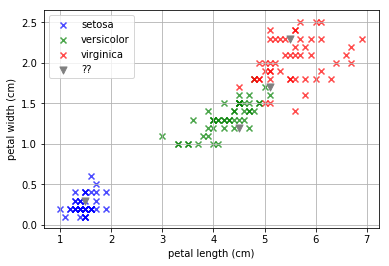

In [9]:
# pylab - loads numerical and graphical libraries into the IPython notebook
%pylab inline

# sklearn is a large collection of machine learning algorithms
# here we’ll use it only for the built-in iris dataset
from sklearn import datasets

iris = datasets.load_iris()

print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)

petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

for target in set(iris.target):
    example_ids = target == iris.target
    scatter(petal_length[example_ids], petal_width[example_ids],
            label=iris.target_names[target], color='bgr'[target],
            marker='x', alpha=0.7)
unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]
])
scatter(unknown[:, 0], unknown[:, 1], marker='v',
        color='gray', s=50, label='??')
xlabel('petal length (cm)')
ylabel('petal width (cm)')
grid(True)
legend(loc='upper left');

Based on these two features, it is easy to distinguish iris setosa from the two remaining species. Yet iris versicolor and virginica remain mixed together. 

Looking closely at the plot, we might estimate the species of the selected unknown irises (gray triangles). For three of them the answer seems obvious – they belong in uniformly-colored areas covered by one species only. Yet unknown iris flower in (5.1, 1.7) is troublesome – it lays on the boundary of versicolor and virginica clusters. We can assume, that its species is the one of the closest one to it, coming from the training set (and so having a label). 

K-Nearest Neighbors method (http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) solves the classification problem, i.e. sets class labels (species in case of irises) of a previously unseen sample by choosing the most common class among the top k neighbors of the sample in question (for instance according to the Euclidean distance). Thus, the k-Nearest Neighbors algorithm works as follows. For each unlabeled sample x:
1. Find k nearest neighbors among the labeled samples.
2. Set the most common label among them as label of x.

## Problem 2 [2p]

1.  **[1p]** Load the iris data (in Python it’s built-in into machine learning libraries, use sklearn.datasets.load_iris), the data is also available on-line at https://archive.ics.uci.edu/ml/datasets/Iris

2.  **[1p]** Irises are described with 4 attributes: petal and sepal widths and lengths. We often plot such data as matrices depicting relationships between pairs of attributes (the diagonal of which holds an ordinary histogram). Write code making a plot like the one below. Please pay attention to the details: make a proper legend and correctly label the axes.

<img src="iris4x4.png"/>

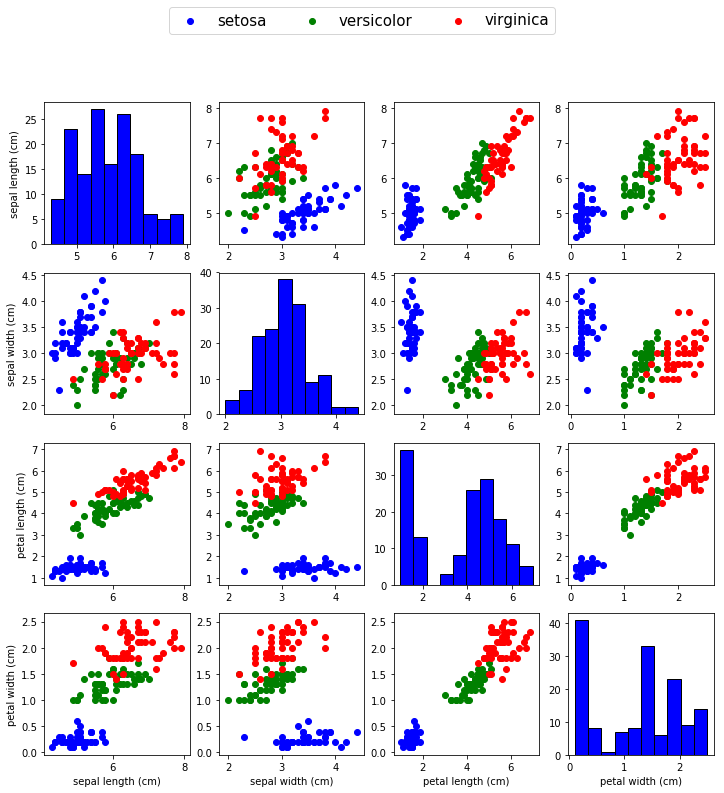

In [161]:
data = [iris.data[:, iris.feature_names.index(t)] for t in iris.feature_names]
# print(data)

fig, axes = plt.subplots(4,4,figsize=(12,12))
for i in range(4):
    for j in range(4):
        if i==j:
            axes[i,j].hist(data[i], color='b', edgecolor='black')
        else:
            for target in set(iris.target):
                example_ids = target == iris.target
                axes[i,j].scatter(data[j][example_ids], data[i][example_ids],
                        label=iris.target_names[target], color='bgr'[target])
        if(i==3):
            axes[i,j].set_xlabel(iris.feature_names[j])
        if(j==0):
            axes[i,j].set_ylabel(iris.feature_names[i])
            
handles, labels = axes[1,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol = 3, fontsize=15)

## Problem 3 [2p]

Implement the k-Nearest Neighbors algorithm. Try to
take advantage of matrix calculus rather than using for loops.

**Tip:** What is computed by \begin{equation} \sqrt{(X - Y)^T (X - Y)} \end{equation} when both X and Y are vectors?

**Tip:** Try to use broadcasting (NumPy: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and built-ins sort, numpy.sort, numpy.argsort (sorting), scipy.stats.mode (choosing the most common element of the set).

In [267]:
from scipy.stats import mode


def KNN(train_X, train_Y, test_X, test_Y, ks, batch_size=200):
    """
    Compute error rate for various 
    """
    errs = np.zeros((len(ks),))
    for i in xrange(0, test_Y.shape[0], batch_size):
        batch_X = test_X[i:i + batch_size]
        batch_Y = test_Y[i:i + batch_size]
        print("Examples %d:%d Computing distances... " % (i, i + batch_size))

        #
        # TODO: fill in an efficient distance matrix computation
        #print(train_Y.shape)
        y = np.diag(train_X.dot(train_X.transpose()))
        #print(y.shape)
        xy = train_X.dot(batch_X.transpose())
        dists = y.reshape(y.shape[0],1) - 2*xy
        #
        print("Sorting... ")
        closest = np.argsort(dists, 0)

        print("Computing errors...")
        targets = train_Y[closest]

        for ki, k in enumerate(ks):
            predictions, unused_counts = mode(targets[:k, :], axis=0)
            predictions = predictions.ravel()
            #
            # TODO: fill in error count computation
            diff = np.not_equal(predictions, batch_Y)
            #print(diff.sum())
            #
            errs[ki] += diff.sum()

    errs /= test_Y.shape
    return (ks, errs)

In [268]:
data2 = np.array(data).transpose()

In [277]:
n = 500
k = range(1,20,2)
averrs = np.zeros(len(k))
m = int(np.floor(2*len(data2)/3))
for i in xrange(n):
    r = np.random.permutation(len(data2))
    features = data2[r]
    targets = iris.target[r]
    #print(data2.shape, targets.shape)
    train_X = features[:m]
    train_Y = targets[:m]
    test_X = features[m:]
    test_Y = targets[m:]
    ks, err = KNN(train_X, train_Y, test_X, test_Y, k)
    averrs += err
averrs = 100*averrs/n
print(err, averrs)

Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Exampl

Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Exampl

Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Computing errors...
Examples 0:200 Computing distances... 
Sorting... 
Comput

[ 4.412  4.076  3.864  3.596  3.38   3.512  3.648  3.908  4.376  4.876]


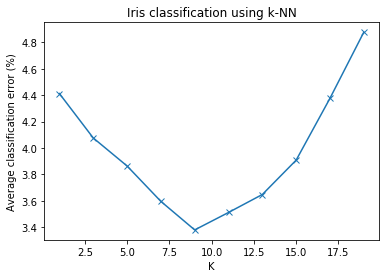

In [278]:
plt.plot(ks, averrs, marker='x')
plt.title("Iris classification using k-NN")
plt.ylabel("Average classification error (%)")
plt.xlabel("K")
print (averrs)

## Problem 4 [2p]
Consider the following experiment:
1. We scramble the data and split it into two parts - training set (66.6% of all samples) and test set (33.4%).
2. Based on the training set, we use the k-NN algorithm to predict the labels on the test set.
3. We then check the number of errors and write it down.

Do this 500 times for k ∈ {1, 3, 5, ..., 19}. Plot a function of the average number of errors
as the function of k. It should be similar to the one below.

<img src="knn.png"/>

## Problem 5 [2p] 

Apply the K-Nearest Neighbors (K-NN) algorithm to the MNIST and CIFAR10 datasets. 

The MNIST (http://yann.lecun.com/exdb/mnist/) dataset consists of normalized (centered and stretched) scans of hand-written digits. Specifically, each element of the dataset is a 28 × 28 grayscale image, thus having 764 8-bit pixels. 

The CIFAR10 (http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of small, 32 by 32 pixels, RGB images belonging to 10 categories.

1. **[1p]** Download and load the MNIST and CIFAR10 datasets. For both datasets, display a few objects from each of the classes, paying attention to aesthetics and clarity of your presentation. **Note:** the datasets are available on Lab computers. Please use the code below to get started.

2. **[2p]** Apply a k-NN classifier to the MNIST and CIFAR10 datasets. First, divide the training set into two parts, which we will call training and validation. On MNIST use the first 50000 samples for training and the last 10000 for validation. On CIFAR10, use 40000 to train and 10000 for validation. Then find the optimal number of neighbors by assessing the accuracy on the validation set. You do not need to repeat this experiment multiple times. Finally, compute the accuracy on the test set obtained with the best previously chosen number of neighbors. On MNIST you should get about 3% errors, while on CIFAR10 you should get about 70% errors. Why CIFAR10 is harder than MNIST? Pick a few mislabeled samples from the test dataset and plot them along with the correct ones. **Note:**
  * MNIST and CIFAR10 are much larger than the Iris dataset. A good implementation may need a few minutes on Lab computers. Please optimize your algorithm:
  * Compute the distances only once, then test for different values of k.
  * Use vectorized expressions to compute the distance. It is possible to compute all distances between the training and testing points in one expression. Hint: think about the vectorized expression \begin{equation}(X - Y)^T (X - Y)\end{equation}.
  * You can use single precision numbers in computation.
  * If your code is taking a long time to execute, please save its results before the lab session.

**Note:** in NumPy, matrices have its own data type (dtype), which is retained during
calculations. Please pay attention to it. I particular, do not subtract values of data types not
having the sign bit, do not divide integers, etc. Results of such operations will not be
automatically casted to types having the required precision.

In [3]:
try:
    import torchvision

    data_path = os.environ.get('PYTORCH_DATA_PATH', '../data')

    mnist_full_train_dataset = torchvision.datasets.MNIST(
        data_path, train=True, download=True)
    mnist_full_train_data_uint8 = mnist_full_train_dataset.train_data.numpy()
    mnist_full_train_labels_int64 = mnist_full_train_dataset.train_labels.numpy()

    mnist_test_dataset = torchvision.datasets.MNIST(
        data_path, train=False, download=True)
    mnist_test_data_uint8 = mnist_test_dataset.test_data.numpy()
    mnist_test_labels_int64 = mnist_test_dataset.test_labels.numpy()
    
except ImportError:
    # Load the same data without torchvision (e.g., on a personal machine)
    with np.load('/pio/data/data/nn17/mnist.npz') as data:
        mnist_full_train_data_uint8 = data['train_data']
        mnist_full_train_labels_int64 = data['train_labels']
        mnist_test_data_uint8 = data['test_data']
        mnist_test_labels_int64 = data['test_labels']
        
# Split train data into train and validation sets
mnist_train_data_uint8 = mnist_full_train_data_uint8[:50000]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:50000]
mnist_valid_data_uint8 = mnist_full_train_data_uint8[50000:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[50000:]

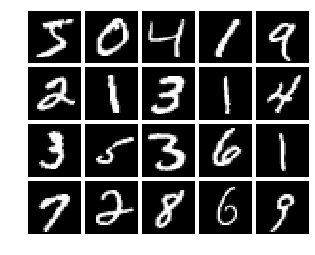

In [27]:
from common.plotting import plot_mat

plot_mat(mnist_train_data_uint8[:20, None], cmap='gray')

In [ ]:
try:
    import torchvision
    #
    # TODO: load CIFAR10
    #
except ImportError:
    with np.load('/pio/data/data/nn17/cifar.npz') as data:
        cifar_full_train_data_uint8 = data['train_data']
        cifar_full_train_labels_int64 = data['train_labels']
        cifar_test_data_uint8 = data['test_data']
        cifar_test_labels_int64 = data['test_labels']

In [ ]:
#
# TODO: plot an example of each class on MNIST and on CIFAR-10
#

In [ ]:
# Now find the best k on the validation set

mnist_validation_errs = KNN(
    mnist_train_data_uint8, mnist_train_labels_int64,
    mnist_valid_data_uint8, mnist_valid_labels_int64,
    [1, 3, 5, 7, 9])

plot(mnist_validation_errs[0, :], mnist_validation_errs[1, :])

In [ ]:
# Now use the best k to compute the test error

best_K = TODO

mnist_full_train_data_uint8 = mnist_train_dataset.train_data.numpy()
mnist_full_train_labels_int64 = mnist_train_dataset.train_labels.numpy()

mnist_test_errs = KNN(mnist_full_train_data_uint8, 
                      mnist_full_train_labels_int64,
                      mnist_test_data_uint8, 
                      mnist_test_labels_int64, [best_K])
print("When k=%d the test error rate is %.1f%%" %
      (mnist_test_errs[0, 0], mnist_test_errs[1, 0] * 100.0))

In [ ]:
#
# Now repeat the k-NN training for CIFAR10
#

# Locality sensitive hashing

Problem 5 was about speeding up the inference using loops implicitly present in matrix multiplication instead of explicit loops in Python. In this problem, we will explore a strategy to truly reduce the total number of computations required to find nearest neighbors without sacrificing too much accuracy.

To speed up nearest neighbor search we will employ *Locality Sensitive Hashing (LSH)* functions. For a given distance metric, the locality sensitive hash should put items that are similar into the same bucket. Notice that this is essentially a design choice opposite to traditional cryptographic hash functions that should amplify the difference of similar inputs (typically we want that small perturbations of data result in large changes to the hash value).

One of the simplest implementations of LSH approximates the cosine distance. Let $x\in \mathbb{R}^N$ and $y\in \mathbb{R}^N$ be two vectors. Their cosine distance is defined as:

\begin{equation}
    d_\text{cos}(x,y) = \frac{x \cdot y}{\|x\| \|y\|} = \cos\left(\theta(x,y)\right),
\end{equation}
where $\theta(x,y)$ is the unsigned angle between $x$ and $y$.

We will construct a family $H$ of hash functions that are an LSH for angle distances (an approximation to cosine distance). Assume $p\in \mathbb{R}^N$ is a random vector (components are sampled from the normal distribution) of length 1. Then define the hash function $h(x) = \text{sgn}(x\cdot p)$, where $\text{sgn()}$ is the sign function. It can be proven that:

\begin{equation}
    p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}.
\end{equation}

The equation means that the probability of a hash collision grows as the the angle between two vectors gets smaller. Therefore, vectors that are close according to the cosine distance will be put with high probability into the same bin (we use the fact that for small $\theta$ we can approximate $\cos(\theta) = 1 - \theta/\pi$.

We will say that a family of randomly chosen hash functions $H$ is $(d_1, d_2, p_1, p_2)$-sensitive with respect to a distance metric $d$ if for any $x$ and $y$:
1. If $d(x,y) \leq d_1$ then $p_{h\in H}[h(x)=h(y)] \geq p_1$.
2. If $d(x,y) \geq d_2$ then $p_{h\in H}[h(x)=h(y)] \leq p_2$.

For example, our family of randomly chosen hyperplanes is $(d_1, d_2, (1-d_1)/\pi, (1-d_2)/\pi)$-sensitive.

Ideally, vectors should be placed into the same bin with a high probability if their distance is smaller than a threshold, and with a low probability if their distance is larger that the threshold. By combining hashing functions we can get closer to this ideal sensitivity.

Given a family of hash functions $H$ with sensitivity $(d_1, d_3, p_1, p_2)$ we can construct a new family $H'$ by combining $r$ functions from $H$:
1. AND: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\forall_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, (p_1)^r, (p_2)^r)$-sensitive.
2. OR: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\exists_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, 1-(1-p_1)^r, 1-(1-p_2)^r)$-sensitive.

AND makes all probabilities shrink, but properly choosing $r$ we can make the lower probability approach 0 while the higher does not. Conversely, OR makes all probabilities grow, we can make the upper probability approach 1 while the lower does not.



## Problem 6 [2-4p bonus] 

1. **[1bp]** **Note:** you can show sketches of proofs for this assignment.
    1. Show that angle between vectors is a metric (https://en.wikipedia.org/wiki/Metric_(mathematics)).
    
    2. Show that $p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}$ for $h$ computed using a randomly chosen hyperplane.

    3. Show the properties of either AND or OR boosting of LSH.

3. **[1-3bp]** Reimplement k-Nearest Neighbors for MNIST classification using the cosine distance instead of the Euclidean distance. Choose a sensible value of $k$. Use Locality Sensitive Hashing to achieve an error rate no greater than $150\%$ of the original error rate with at least a $90\%$ speedup (i.e., by considering on average at most 5000 training samples per query image). For a few settings plot the speedup-vs-accuracy relation.

  **Note:** points will be awarded based on ingenuity of your solution. Feel free to explore your own ideas!
